# feature selection with filter method

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
data = pd.read_csv(r'C:\Users\nikhi\Desktop\practice copy\Feature-Selection-for-Machine-Learning-master\Data-Files-for-Feature-Selection-master\santander-train.csv', nrows = 20000)

In [9]:
data.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
0                        0                        0                0.0   
1                        0                        0                0.0   
2                        0                        0                0.0   
3                        0                        0                0.0   
4                        0                        0                0.0   

   imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                    195.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  \
0                      0.0                0.0                      0.0   
1                      0.0                0.0                      0.0   
2                      0.0                0.0                      0.0   
3                      0.0              195.0                      0.0   
4                      0.0                0.0                      0.0   

   imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  ind_var1_0  \
0                      0.0                0.0                 0.0           0   
1                      0.0                0.0                 0.0           0   
2                      0.0                0.0                 0.0           0   
3                      0.0              195.0                 0.0           0   
4                      0.0                0.0                 0.0           0   

   ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  \
0         0           0         0           1         0           0         0   
1         0           0         0           1         0           0         0   
2         0           0         0           1         1           0         0   
3         0           0         0           1         1           0         0   
4         0           0         0           1         0           0         0   

   ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  \
0           0         0            0          0            0   
1           0         0            0          0            1   
2           0         0            0          0            0   
3           0         0            0          0            0   
4           0         0            1          1            0   

   ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  \
0                  0                0                  0                0   
1                  1                1                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4   

In [11]:
data.shape

(20000, 371)

In [13]:
X = data.drop('TARGET',axis=1)
y = data['TARGET']

X.shape , y.shape

((20000, 370), (20000,))

In [14]:
#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 , stratify = y )

# Constant removal

In [15]:
Constant_filter = VarianceThreshold(threshold=0)
Constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [16]:
Constant_filter.get_support().sum()

291

In [19]:
constant_list = [not temp for temp in Constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [23]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [24]:
len(X.columns[constant_list])

79

In [25]:
X_train_filter = Constant_filter.transform(X_train)
X_test_filter = Constant_filter.transform(X_test)

In [26]:
X_train_filter.shape, X_test_filter.shape,X_train.shape

((16000, 291), (4000, 291), (16000, 370))

In [ ]:
# ###############################################################################################################################

# Quasi-constant feature removal

In [27]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [28]:
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [30]:
quasi_constant_filter.get_support().sum()

245

In [32]:
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [59]:
X_train_quasi_filter.shape , X_test_quasi_filter.shape ,X_train_filter.shape

((16000, 245), (4000, 245), (16000, 291))

In [ ]:
#################################################################################################################################

# Remove Duplicate Feature

In [ ]:
#Here we have to transpose rows= column and column=row

In [63]:
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [64]:
type(X_train_T)

numpy.ndarray

In [65]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [67]:
X_train_T.shape ,X_test_T.shape

((245, 16000), (245, 4000))

In [69]:
X_train_T.duplicated().sum()

18

In [70]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37      True
38     False
39      True
40     False
41     False
42     False
43      True
44     False
45      True
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71      True
72     False
73      True
74     False
75     False
76     False

In [71]:
features_to_keep = [not index for index in duplicated_features]
#features_to_keep

In [72]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [74]:
X_train_unique.shape , X_test_unique.shape

((16000, 227), (4000, 227))

In [ ]:
Build  Ml model and compare the performance of the selected feature

In [ ]:
# def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state= 0, n_jobs= -1)
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy:' )
    print(accuracy_score(y_test , y_pred))

In [ ]:
#Selected feature

In [80]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy:
0.95875
Wall time: 2.23 s


In [ ]:
#Originnal feature

In [81]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:
0.9585
Wall time: 2.53 s


In [ ]:
################################################################################################################################

# Feature selection with auto correlation

In [83]:
corrmat = X_train_unique.corr()

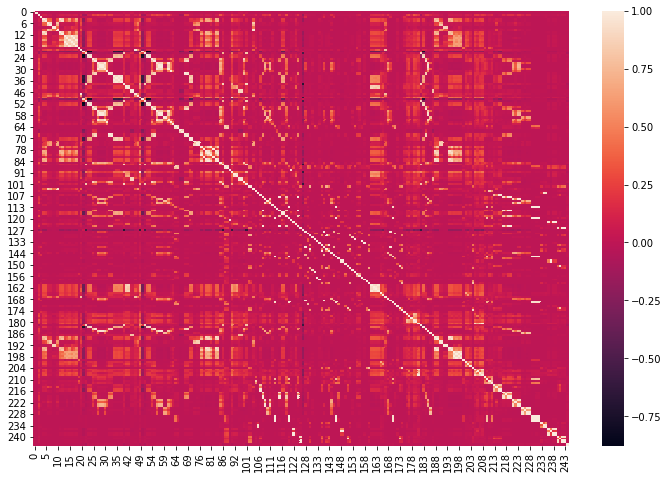

In [85]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat)

In [93]:
# find and remove correlated features
def get_correlation(data, threshold):
    corr_col = set()                                                     # Set of all the names of correlated columns
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:                      # we are interested in absolute coeff value
                colname = corrmat.columns[i]                             # getting the name of column
                corr_col.add(colname)
    return corr_col

In [94]:
corr_features = get_correlation(X_train_unique, 0.85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [95]:
len(corr_features)

124

In [96]:
# removed correlated  features

X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [97]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

In [98]:
%%time
run_randomForest(X_train_uncorr, X_test_uncorr, y_train, y_test)

Accuracy:
0.95875
Wall time: 1.8 s


In [99]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:
0.9585
Wall time: 2.87 s


In [ ]:
####################################################

# Feature Grouping and Feature Importance

In [117]:
corrmat

0         1         2         3         4         5         6    \
0    1.000000 -0.025277 -0.001942  0.003594  0.004054 -0.001697 -0.015882   
1   -0.025277  1.000000 -0.007647  0.001819  0.008981  0.009232  0.001638   
2   -0.001942 -0.007647  1.000000  0.030919  0.106245  0.109140  0.048524   
3    0.003594  0.001819  0.030919  1.000000  0.029418  0.024905  0.014513   
4    0.004054  0.008981  0.106245  0.029418  1.000000  0.888789  0.381632   
5   -0.001697  0.009232  0.109140  0.024905  0.888789  1.000000  0.363680   
6   -0.015882  0.001638  0.048524  0.014513  0.381632  0.363680  1.000000   
7   -0.019807  0.001746  0.055708  0.013857  0.341266  0.384820  0.908158   
8    0.000956  0.000614  0.004040 -0.000613  0.012927  0.017671  0.030397   
9   -0.000588  0.000695  0.005796 -0.000691  0.019674  0.030060  0.036359   
10  -0.012443  0.001517  0.042368  0.012451  0.298916  0.280081  0.805265   
11   0.010319  0.009097  0.096719  0.026377  0.938409  0.824893  0.038751   
12   0.005268  0.009360  0.098070  0.021968  0.838953  0.943622  0.067664   
13   0.017605 -0.002511  0.082025  0.016331  0.266746  0.254702  0.040788   
14   0.016960 -0.001086  0.095485  0.016458  0.326051  0.359897  0.048914   
15   0.018040  0.002426  0.106415  0.024014  0.638412  0.565620  0.043920   
16   0.017400 -0.002401  0.081028  0.015979  0.263482  0.252160  0.043357   
17   0.016745 -0.001019  0.095009  0.016239  0.324417  0.358769  0.051373   
18   0.015206  0.002629  0.110912  0.025558  0.673593  0.599584  0.190138   
19  -0.000103  0.000519  0.016886 -0.000520  0.049579  0.042621  0.012454   
20  -0.001198  0.004590  0.107680  0.007478  0.227803  0.238159  0.306165   
21  -0.006814 -0.008975 -0.105502 -0.002101 -0.208030 -0.211873 -0.071459   
22  -0.002037  0.041015 -0.102487  0.017541  0.041167  0.041372 -0.006549   
23   0.010356  0.008019  0.107570  0.003429  0.200514  0.182937  0.035401   
24   0.012021  0.007439  0.101605  0.004843  0.220673  0.201909  0.039018   
25   0.001732  0.011525  0.273152  0.010099  0.027387  0.026378  0.046258   
26   0.001138  0.009467  0.231649  0.015117  0.033757  0.037053  0.044225   
27  -0.004836  0.009771  0.299165  0.036569 -0.010411 -0.013701  0.020327   
28  -0.006480  0.008796  0.241707  0.040420 -0.012628 -0.018755  0.009992   
29  -0.005811  0.008676  0.237830  0.041165 -0.012035 -0.018146  0.010326   
30  -0.003929  0.009662  0.296879  0.037154 -0.010694 -0.013691  0.020723   
31  -0.002340  0.006484  0.149274 -0.001398  0.030235  0.033603  0.021277   
32   0.004714  0.009172  0.262784  0.012668  0.014793  0.012309  0.041521   
33   0.005018  0.008687  0.253780  0.013574  0.009176  0.008896  0.044490   
34   0.005088  0.007043  0.083030  0.007590  0.232927  0.207025  0.055252   
35   0.006998  0.006730  0.091234  0.005443  0.223937  0.193763  0.055700   
36   0.005580  0.007178  0.095103  0.007195  0.229660  0.203996  0.054036   
38   0.007236  0.006622  0.082214  0.005737  0.226089  0.195968  0.056746   
40   0.001648  0.050629  0.032543  0.025432  0.108756  0.100952  0.003721   
41  -0.000359  0.011849  0.136317  0.046103  0.267246  0.274224  0.051582   
42  -0.001014  0.011192  0.131298  0.047393  0.260103  0.267309  0.055315   
44   0.013335  0.056713  0.050543  0.014374  0.073621  0.074995  0.009936   
46   0.014445  0.056165  0.044957  0.014503  0.063820  0.061023 -0.008396   
47  -0.001198  0.004590  0.107680  0.007478  0.227803  0.238159  0.306165   
48  -0.003186  0.002729  0.065726  0.011140  0.259411  0.276690  0.508786   
49   0.005104  0.039232  0.200887  0.050206  0.386110  0.382575  0.092356   
50  -0.000178 -0.006837 -0.097923 -0.001903 -0.186566 -0.189833 -0.066184   
51  -0.001577  0.040789 -0.101197  0.017432  0.043505  0.043476 -0.006668   
52   0.010356  0.008019  0.107570  0.003429  0.200514  0.182937  0.035401   
53   0.012021  0.007439  0.101605  0.004843  0.220673  0.201909  0.039018   
54   0.001288  0.011362  0.271428  0.009349  0.026058  0.025950  0.044015   
55   0

In [130]:
corrdata =  corrmat.abs().stack()
corrdata

0    0      1.000000e+00
     1      2.527655e-02
     2      1.941717e-03
     3      3.594277e-03
     4      4.053555e-03
     5      1.697412e-03
     6      1.588228e-02
     7      1.980660e-02
     8      9.556954e-04
     9      5.882051e-04
     10     1.244330e-02
     11     1.031929e-02
     12     5.267526e-03
     13     1.760468e-02
     14     1.696007e-02
     15     1.803966e-02
     16     1.740028e-02
     17     1.674460e-02
     18     1.520567e-02
     19     1.034209e-04
     20     1.197797e-03
     21     6.814168e-03
     22     2.036657e-03
     23     1.035641e-02
     24     1.202056e-02
     25     1.732072e-03
     26     1.137843e-03
     27     4.835888e-03
     28     6.480075e-03
     29     5.811198e-03
     30     3.928949e-03
     31     2.340100e-03
     32     4.714475e-03
     33     5.018415e-03
     34     5.087702e-03
     35     6.997846e-03
     36     5.580254e-03
     38     7.236187e-03
     40     1.648490e-03
     41     3.594615e-04


In [131]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
181  181    1.000000e+00
159  159    1.000000e+00
160  160    1.000000e+00
161  161    1.000000e+00
162  162    1.000000e+00
163  163    1.000000e+00
164  164    1.000000e+00
165  165    1.000000e+00
166  166    1.000000e+00
167  167    1.000000e+00
168  168    1.000000e+00
169  169    1.000000e+00
170  170    1.000000e+00
171  171    1.000000e+00
158  158    1.000000e+00
173  173    1.000000e+00
174  174    1.000000e+00
175  175    1.000000e+00
176  176    1.000000e+00
177  177    1.000000e+00
183  183    1.000000e+00
178  178    1.000000e+00
179  179    1.000000e+00
180  180    1.000000e+00
172  172    1.000000e+00
244  244    1.000000e+00
185  185    1.000000e+00
157  157    1.000000e+00
129  129    1.000000e+00
130  130    1.000000e+00
     138    1.000000e+00
131  131    1.000000e+00
132  132    1.000000e+00
133  133    1.000000e+00
134  134    1.000000e+00


In [132]:
corrdata = corrdata[corrdata >  0.85]
corrdata = corrdata[corrdata < 1]

In [133]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['feature1', 'feature2', 'corr_value']
corrdata

feature1  feature2  corr_value
0         143       135    1.000000
1         135       143    1.000000
2         136       128    1.000000
3         128       136    1.000000
4          31        62    1.000000
5          62        31    1.000000
6          20        47    1.000000
7          47        20    1.000000
8          52        23    1.000000
9          23        52    1.000000
10         53        24    1.000000
11         24        53    1.000000
12         33        69    1.000000
13         69        33    1.000000
14        157       133    1.000000
15        133       157    1.000000
16        237       149    1.000000
17        149       237    1.000000
18        154       132    1.000000
19        132       154    1.000000
20        146       230    0.999997
21        230       146    0.999997
22        238       122    0.999945
23        122       238    0.999945
24        148       149    0.999929
25        149       148    0.999929
26        237       148    0.999929
27        148       237    0.999929
28        231       232    0.999892
29        232       231    0.999892
30        232       113    0.999875
31        113       232    0.999875
32        231       113    0.999864
33        113       231    0.999864
34         82        78    0.999859
35         78        82    0.999859
36        146       229    0.999778
37        229       146    0.999778
38        230       229    0.999769
39        229       230    0.999769
40        108       115    0.999478
41        115       108    0.999478
42         68        32    0.999265
43         32        68    0.999265
44        239       122    0.998991
45        122       239    0.998991
46        199       197    0.998753
47        197       199    0.998753
48        239       238    0.998497
49        238       239    0.998497
50        181       208    0.997718
51        208       181    0.997718
52        231       229    0.997518
53        229       231    0.997518
54        229       232    0.997200
55        232       229    0.997200
56        198       196    0.997074
57        196       198    0.997074
58        231       146    0.997052
59        146       231    0.997052
60        230       231    0.997042
61        231       230    0.997042
62        113       120    0.997002
63        120       113    0.997002
64        120       231    0.996936
65        231       120    0.996936
66        232       120    0.996904
67        120       232    0.996904
68        146       232    0.996772
69        232       146    0.996772
70        230       232    0.996765
71        232       230    0.996765
72         17        14    0.996739
73         14        17    0.996739
74        229       113    0.996691
75        113       229    0.996691
76        146       113    0.996424
77        113       146    0.996424
78        230       113    0.996422
79        113       230    0.996422
80         13        16    0.994224
81         16        13    0.994224
82         55        26    0.993996
83         26        55    0.993996
84        120       229    0.993649
85        229       120    0.993649
86        242       243    0.993536
87        243       242    0.993536
88        120       146    0.993307
89        146       120    0.993307
90        230       120    0.993305
91        120       230    0.993305
92         28        57    0.993186
93         57        28    0.993186
94         51        22    0.992882
95         22        51    0.992882
96        219       108    0.992870
97        108       219    0.992870
98        219       115    0.992448
99        115       219    0.992448
100        44        46    0.990593
101        46        44    0.990593
102        77        81    0.989793
103        81        77    0.989793
104       109       223    0.989341
105       223       109    0.989341
106        27        30    0.988738
107        30        27    0.988738
108       223       224    0.988642
109       224       223    0.988642
110      

In [135]:
grouped_feature_list = []
correlated_groups_list =[]
for feature in corrdata.feature1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.feature1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.feature2.unique()) +[feature]
        correlated_groups_list.append(correlated_block)

In [136]:
len(correlated_groups_list)

56

In [137]:
X_train_uncorr.shape , X_train.shape 

((16000, 103), (16000, 370))

In [138]:
for group in correlated_groups_list:
    print(group)

   feature1  feature2  corr_value
0       143       135         1.0
     feature1  feature2  corr_value
2         136       128    1.000000
197       136       169    0.959468
   feature1  feature2  corr_value
4        31        62         1.0
   feature1  feature2  corr_value
6        20        47         1.0
     feature1  feature2  corr_value
8          52        23    1.000000
297        52        24    0.927683
299        52        53    0.927683
448        52        21    0.877297
505        52       183    0.860163
     feature1  feature2  corr_value
12         33        69    1.000000
224        33        32    0.947113
228        33        68    0.946571
322        33        26    0.917665
337        33        55    0.914178
422        33       184    0.884383
    feature1  feature2  corr_value
14       157       133         1.0
    feature1  feature2  corr_value
16       237       149    1.000000
26       237       148    0.999929
    feature1  feature2  corr_value
18       1

In [ ]:
########################################

# Feature Importance based on tree based classifier

In [152]:
important_features = []

In [153]:
for group in correlated_groups_list:
    features = list(group.feature1.unique()) + list(group.feature2.unique())
    rf = RandomForestClassifier(n_estimators=100 ,random_state= 0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ['features','importance']
    importance.sort_values(by ='importance', ascending=False, inplace=True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [154]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64,
 features      128.000000
 importance      0.563757
 Name: 1, dtype: float64,
 features      62.00
 importance     0.51
 Name: 1, dtype: float64,
 features      47.00
 importance     0.51
 Name: 1, dtype: float64,
 features      183.000000
 importance      0.285817
 Name: 5, dtype: float64,
 features      184.00000
 importance      0.34728
 Name: 6, dtype: float64,
 features      157.000000
 importance      0.523077
 Name: 0, dtype: float64,
 features      148.000000
 importance      0.624498
 Name: 2, dtype: float64,
 features      132.000000
 importance      0.565217
 Name: 1, dtype: float64,
 features      120.000000
 importance      0.749683
 Name: 6, dtype: float64,
 features      122.000000
 importance      0.343434
 Name: 1, dtype: float64,
 features      82.000000
 importance     0.518827
 Name: 0, dtype: float64,
 features      125.000000
 importance      0.940524
 Name: 3, dtype: float64,
 features      197

In [155]:
important_features = pd.DataFrame(important_features)

In [156]:
important_features.reset_index(inplace=True , drop=True)
important_features

features  importance
0      135.0    0.510000
1      128.0    0.563757
2       62.0    0.510000
3       47.0    0.510000
4      183.0    0.285817
5      184.0    0.347280
6      157.0    0.523077
7      148.0    0.624498
8      132.0    0.565217
9      120.0    0.749683
10     122.0    0.343434
11      82.0    0.518827
12     125.0    0.940524
13     197.0    0.289727
14     207.0    0.312834
15      17.0    0.286833
16     243.0    0.431557
17     185.0    0.391367
18     182.0    0.432045
19      95.0    0.487162
20      84.0    0.299008
21     221.0    0.285550
22       8.0    0.345509
23     228.0    0.434186
24     117.0    0.517013
25      49.0    0.500161
26     100.0    0.386775
27     191.0    0.345104
28      34.0    0.283901
29      15.0    0.400677
30     107.0    0.349126
31      61.0    0.323735
32      41.0    0.386338
33     102.0    0.508955
34     189.0    0.229269
35      72.0    0.490102
36      60.0    0.500520
37      79.0    0.213903
38     234.0    0.469178
39     104.0    0.640915
40     179.0    0.634779
41     151.0    0.510000
42     161.0    0.346426
43       5.0    0.356386
44       5.0    0.403831
45      93.0    0.544349
46     121.0    0.510000
47      87.0    0.553622
48     174.0    0.743723
49      50.0    0.616659
50       7.0    0.545702
51      87.0    0.746200
52      86.0    0.447693
53     153.0    0.515152
54     151.0    0.510000
55      66.0    0.630293

In [157]:
feature_to_consider = set(important_features['features'])

In [159]:
feature_to_discard = set(corr_features) - set(feature_to_consider)

In [160]:
feature_to_discard = list(feature_to_discard)

In [162]:
X_train_grouped_uncorr = X_train_unique.drop(labels = feature_to_discard, axis = 1)

In [163]:
X_train_grouped_uncorr.shape

(16000, 140)

In [164]:
X_test_grouped_uncorr = X_test_unique.drop(labels = feature_to_discard, axis = 1)
X_test_grouped_uncorr.shape

(4000, 140)

In [165]:
%%time
run_randomForest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

Accuracy:
0.95775
Wall time: 3.1 s


In [166]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:
0.9585
Wall time: 5.21 s
